### Creacion de un indice comun basado en las volatilidades

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = pd.read_excel("./Base de datos/volatilidades.xlsx", index_col="Date")

data.head()

,S&P Futures,Dow Jones Futures,Nasdaq Futures,FTSE 100,Nikkei 225,HSI,U.S. Treasure Bonds Futures,10-Year T-Note Futures,Copper Futures,Silver Futures,Gold Futures,Platinum Futures,Natural Gas Futures,Corn Futures,Soybean Meal Futures
Date,,,,,,,,,,,,,,,
2002-04-09,1.527499,1.390750,3.110670,1.080415,1.360546,1.061883,0.556248,0.372455,0.987684,1.276271,0.767790,1.200583,3.812311,1.253944,1.175028
2002-04-10,1.442578,1.302064,3.177577,1.020012,1.468060,1.038048,0.557534,0.376302,0.991441,1.268038,0.770516,1.185536,3.797843,1.245323,1.172981
2002-04-11,1.384686,1.342166,2.966525,1.013011,1.423560,1.037447,0.556877,0.371920,0.991911,1.290618,0.783491,1.168044,3.673798,1.232567,1.184198
2002-04-12,1.655814,1.516551,2.931622,1.145237,1.375925,1.036453,0.556162,0.366298,0.988266,1.293884,0.776472,1.156494,3.587795,1.255886,1.205026
2002-04-15,1.546565,1.399080,2.784031,1.088333,1.421108,1.017653,0.552295,0.367531,1.001940,1.283705,0.769644,1.139783,3.473926,1.245323,1.207095


Debido a la existencia de indices financiero y cotizaciones, es propicio estimar dos indices diferentes, del cual, el indice global ser el promedio

In [3]:
X = data.to_numpy()

X

array([[1.52749867, 1.39075005, 3.11066961, ..., 3.81231108, 1.25394417,
        1.17502782],
       [1.44257772, 1.30206402, 3.1775769 , ..., 3.79784328, 1.24532335,
        1.17298131],
       [1.38468604, 1.34216551, 2.96652543, ..., 3.6737975 , 1.23256693,
        1.18419812],
       ...,
       [1.42896352, 1.12475987, 1.91214982, ..., 5.54963796, 1.3989464 ,
        1.90164826],
       [1.34404956, 1.05786833, 1.82696605, ..., 5.43501894, 1.3816809 ,
        1.88933396],
       [1.28805901, 1.06197225, 1.73200627, ..., 5.3586989 , 1.36003491,
        1.85388945]])

In [4]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [5]:
new = pca.transform(X) 

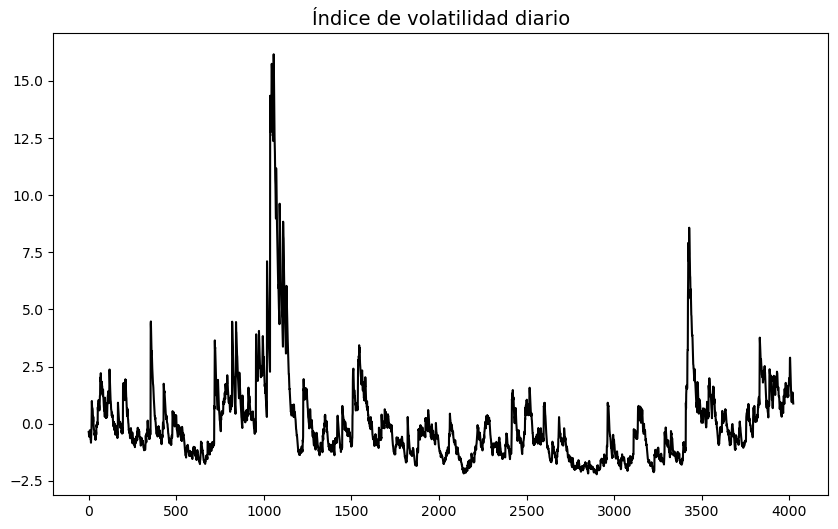

In [6]:
plt.figure(figsize=(10,6))
plt.plot(new, color="black")

plt.title("Índice de volatilidad diario", fontsize=14)

plt.savefig("./graphs/pca_daily.pdf")
plt.show()

In [7]:
data["PCA"] = new
pca_d = data[["PCA"]]

data.tail()

,S&P Futures,Dow Jones Futures,Nasdaq Futures,FTSE 100,Nikkei 225,HSI,U.S. Treasure Bonds Futures,10-Year T-Note Futures,Copper Futures,Silver Futures,Gold Futures,Platinum Futures,Natural Gas Futures,Corn Futures,Soybean Meal Futures,PCA
Date,,,,,,,,,,,,,,,,
2022-12-06,1.528040,1.214848,1.998993,0.687201,1.077772,2.541078,0.922041,0.538488,1.946824,2.434511,1.145677,1.977878,5.861778,1.447702,1.683882,1.363209
2022-12-07,1.542920,1.214186,2.033110,0.701219,1.041388,2.462275,0.930755,0.533398,1.901194,2.391007,1.125692,1.950751,5.646948,1.424512,1.843214,1.267887
2022-12-08,1.428964,1.124760,1.912150,0.695577,1.037092,2.510393,0.935032,0.538797,1.869063,2.400014,1.118450,1.933129,5.549638,1.398946,1.901648,1.143100
2022-12-09,1.344050,1.057868,1.826966,0.677349,1.014464,2.549666,0.924741,0.540243,1.827683,2.373778,1.099548,1.892428,5.435019,1.381681,1.889334,0.991466
2022-12-12,1.288059,1.061972,1.732006,0.654125,1.039763,2.523945,0.918830,0.531577,1.783680,2.361976,1.084738,1.895759,5.358699,1.360035,1.853889,0.881287


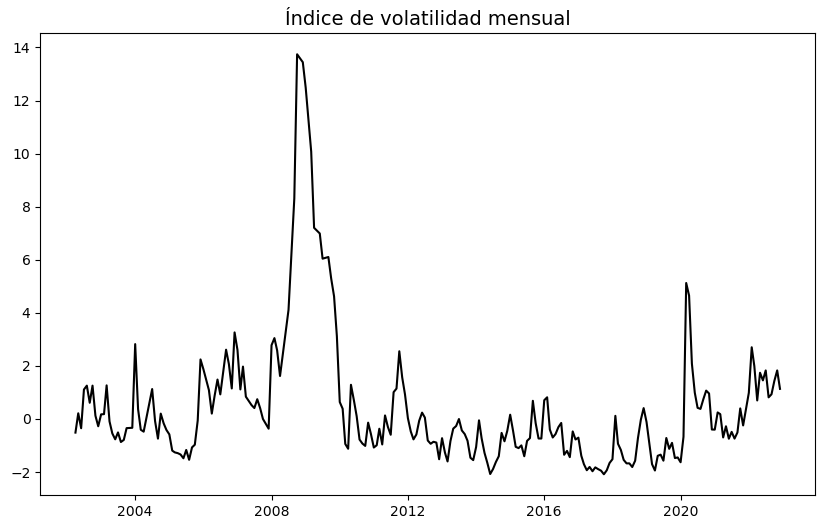

In [8]:
pca_m = data.groupby(data.index.strftime('%Y-%m')).PCA.agg(['mean'])
pca_m.index = pd.to_datetime(pca_m.index)
pca_m = pca_m.rename(columns={"mean": "PCA"})

plt.figure(figsize=(10,6))

plt.plot(pca_m, color="black")
plt.title("Índice de volatilidad mensual", fontsize=14)

plt.savefig("./graphs/pca_montly.pdf")
plt.show()

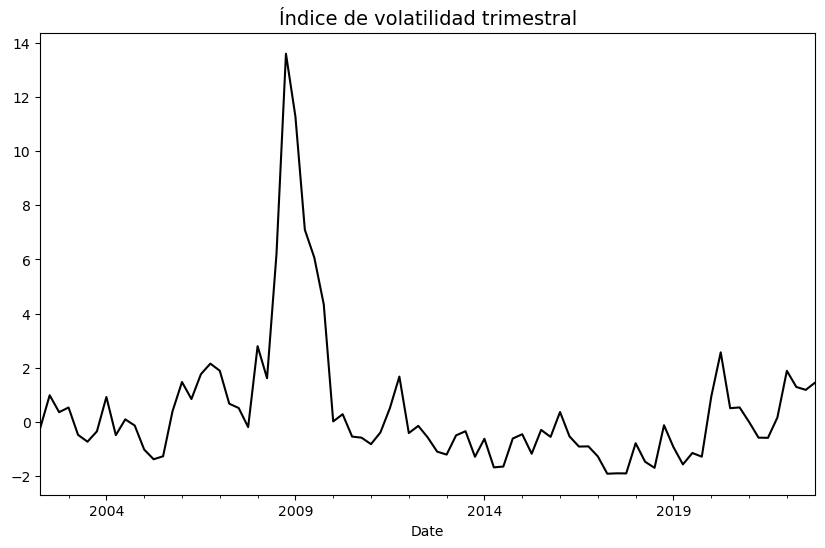

In [9]:
pca_q = pca_m.resample('Q').mean()

pca_q.plot(figsize=(10,6), color="black")
plt.title("Índice de volatilidad trimestral", fontsize=14)
plt.legend().remove()

plt.savefig("./graphs/pca_quarterly.pdf")
plt.show()

In [10]:
with pd.ExcelWriter("./Base de datos/PCA.xlsx") as writer:
    pca_d.to_excel(writer, sheet_name="Diario")
    pca_m.to_excel(writer, sheet_name="Mensual")
    pca_q.to_excel(writer, sheet_name="Trimestral")

### Comparativa con el CBOE Volatility Index (VIX)

In [11]:
vix = pd.read_excel("./Base de datos/vix.xlsx", sheet_name="Diario", index_col="Date")
vix.reset_index(inplace=True)

vix.tail()

,Date,VIX
5203,2022-12-06,22.170000
5204,2022-12-07,22.680000
5205,2022-12-08,22.290001
5206,2022-12-09,22.830000
5207,2022-12-12,25.000000


In [12]:
pca_d.reset_index(inplace=True)

pca_d.tail()

,Date,PCA
4018,2022-12-06,1.363209
4019,2022-12-07,1.267887
4020,2022-12-08,1.143100
4021,2022-12-09,0.991466
4022,2022-12-12,0.881287


In [13]:
df = pd.merge(pca_d, vix)
df.set_index("Date", inplace=True)

df

,PCA,VIX
Date,,
2002-04-09,-0.367845,19.469999
2002-04-10,-0.408054,18.190001
2002-04-11,-0.531642,20.299999
2002-04-12,-0.414079,19.420000
2002-04-15,-0.581532,19.820000
...,...,...
2022-12-06,1.363209,22.170000
2022-12-07,1.267887,22.680000
2022-12-08,1.143100,22.290001


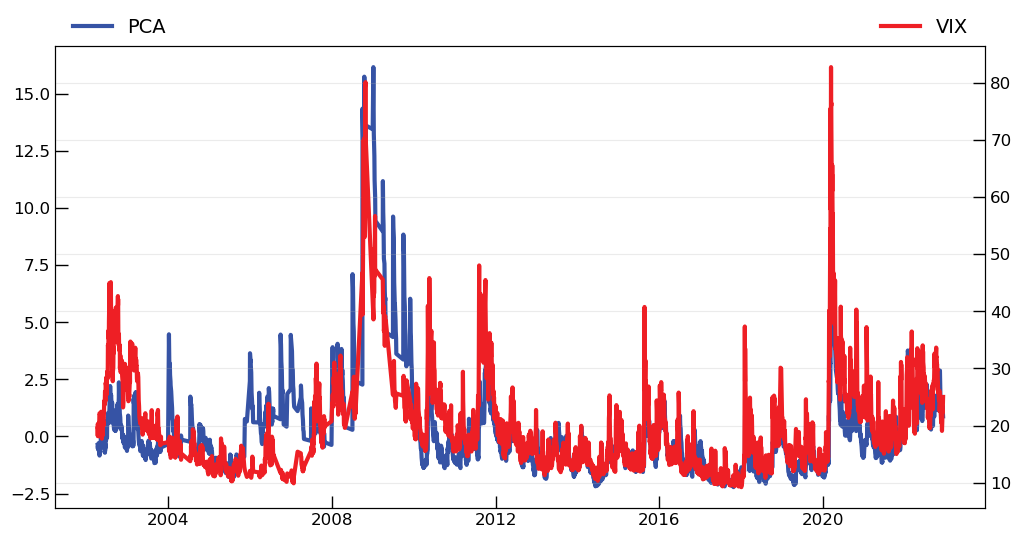

In [14]:
fig, ax1 = plt.subplots(figsize=(12, 6), linewidth = 2.5)
ax2 = ax1.twinx()

#Graficas
ax1.plot(df.index, df["PCA"], label="PCA", color = "#3653A5", linewidth = 3)
ax2.plot(df.index, df["VIX"], label="VIX", color = "#EE1F25", linewidth = 3)

#Posicionando las leyendas
ax1.legend(bbox_to_anchor=(0, 1.1), loc = 'upper left', fontsize=14, frameon=False)
ax2.legend(bbox_to_anchor=(1, 1.1), loc = 'upper right', fontsize=14, frameon=False)

#Editando los ticks
ax1.tick_params(direction='in', which='both', length=9, width=1, labelsize=12)
ax2.tick_params(direction='in', which='both', length=9, width=1, labelsize=12)

plt.grid(True, alpha=0.25)

plt.savefig("./graphs/comparativa.pdf")
plt.show()